<hr style="border:2px solid #808080"> </hr>
<center><h1 style="color:#173F8A;"> Ecuaciones Diferenciales MAT1640</h1></center>
<center><h1 style="color:#173F8A;"> Capítulo 1: Ecuaciones Diferenciales de Primer Orden</h3></center>
<center><h1 style="color:#0176DE;"> Prof. Manuel A. Sánchez</h3></center>
<hr style="border:2px solid #808080"> </hr>

<h1 style="margin-bottom:0.5cm;">Tabla de Contenidos:<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Clase-1:" data-toc-modified-id="Clase 1:">Clase 1:</a>
            </span>
        </li>
    </ul>
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Clase-2:" data-toc-modified-id="Clase-2:">Clase 2:</a>
            </span>
        </li>
    </ul>
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Clase-3:" data-toc-modified-id="Clase-3:">Clase 3:</a>
            </span>
        </li>
    </ul>
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Clase-4:" data-toc-modified-id="Clase-4:">Clase 4:</a>
            </span>
        </li>
    </ul>
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Clase-5:" data-toc-modified-id="Clase-5:">Clase 5:</a>
            </span>
        </li>
    </ul>
</div>


In [1]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
display(HTML("""<style>.output {display: flex;align-items: center;text-align: center;}</style>"""))

## Clase 1:
### secion 1.1 y 1.2

### Ejemplo Modelo SIR para epidemias

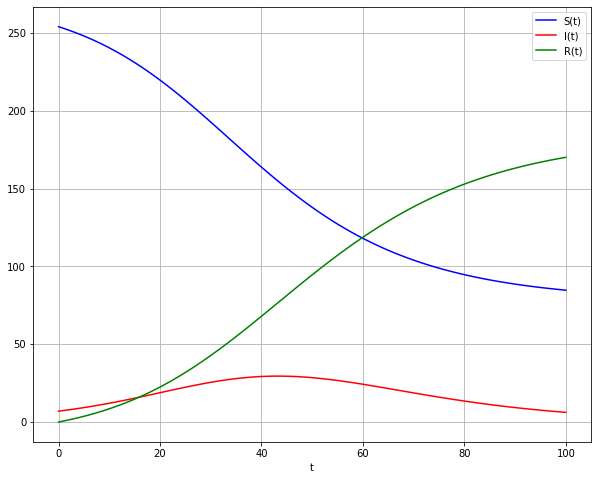

In [2]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
# Run the model
def SIR_ode(y, t, beta, gamma):
    # SIR Model 
    # dS/dt = f1; dS/dt = f2; dS/dt = f3 
    # variabeles
    S = y[0]
    I = y[1]
    R = y[2]
    # right-hand side
    f1 = -beta*S*I
    f2 = beta*S*I -gamma*I
    f3 = gamma*I
    return(np.array([f1, f2, f3]))
# Initial conditions
S0 = 254;I0 = 7; R0 = 0

# threshold paramter R_0
R_0 = 1.64
gamma = 1.0/11.0
beta  = R_0*gamma/S0 

y0   = np.array([S0, I0, R0])

t0 = 0
T  = 100
tn = np.linspace(t0, T, 100)

y = odeint(SIR_ode, y0, tn, args = (beta, gamma))


plt.figure(figsize=(10,8))
plt.plot(tn, y[:, 0], 'b', label='S(t)')
plt.plot(tn, y[:, 1], 'r', label='I(t)')
plt.plot(tn, y[:, 2], 'g', label='R(t)')

plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

#plt.style.use('seaborn-whitegrid')
x, y = sym.symbols('x, y')

## Ejemplos familia de soluciones


1. Considere la ecuacion diferencial
\begin{equation}
\frac{d y }{dt}  = k y
\end{equation}
para $k$ una constante. 

 - Una solucion de esta ecuacion es 
$$u(t) = \exp(kt), \quad\mbox{ya que se comprueba que }\frac{d u } {dt} = k\exp(k t) = k u$$.

 - La familia de soluciones de la ecuacion es 
 $$y(t) = C \exp(kt), \quad \mbox{para un parametro } C\in\mathbb R,\qquad\mbox{ ya que se comprueba que }\frac{d y}{dt} = C k \exp(kt) = k y$$


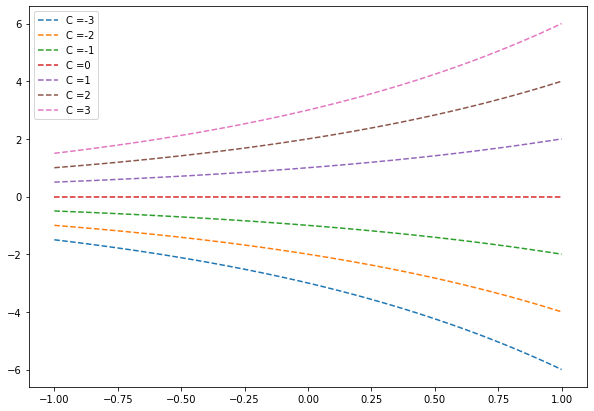

In [4]:
k = np.log(2)
t = np.linspace(-1,1,100)
u = np.exp(k*t)
C = [-3,-2,-1,0,1,2,3]
ys = [ Ci*np.exp(k*t) for Ci in C]

fig, ax = plt.subplots(1,1, figsize = (10,7))

for i,Ci in enumerate(C):
    ax.plot(t, ys[i], '--',label = "C ="+ str(Ci))
ax.legend()
plt.show()

### Ejemplo: Quiz

Considere la ecuacion diferencial
\begin{equation}
\frac{d y }{dt}  = y^{2}
\end{equation}
con condicion inicial $y(1) = 2$

Una solucion de esta ecuacion es 
$$u(t) = -1 / t,\quad t\in\mathbb R\backslash \{0\}\qquad \mbox{ya que se comprueba que } \frac{d u } {dt} = 1/t^{2} = u^{2}$$

La familia de soluciones de la ecuacion es 
$$y(t) = \frac{1}{C-t}, \mbox{ para un parametro }C\in\mathbb R,\qquad \mbox{ya que se comprueba que }\frac{d y}{dt} = \frac{1}{C-t^{2}} =  y^{2}$$


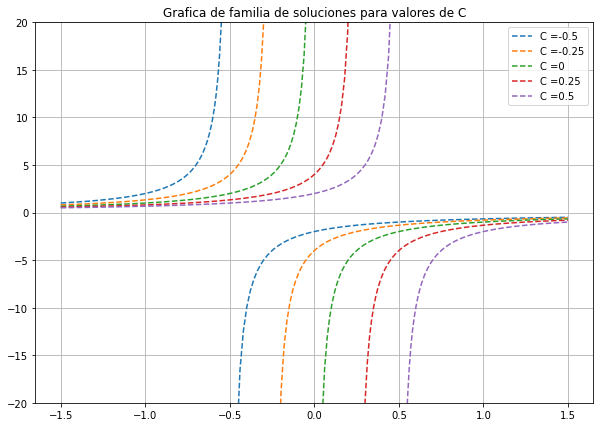

In [5]:
k = np.log(2)
C = [-0.5, -0.25,0,0.25,0.5]
ys = [ 1/(Ci-t) for Ci in C]

fig, ax = plt.subplots(1,1, figsize = (10,7))

colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
for i,Ci in enumerate(C):
    epsi = 10**(-8)
    ti_l = np.linspace(-1.5,Ci-epsi, 100)
    ti_r = np.linspace(Ci+epsi, 1.5, 100)
    yi_l =  1/(Ci-ti_l)
    yi_r =  1/(Ci-ti_r)
    ti = np.concatenate((ti_l,ti_r))
    yi = np.concatenate((yi_l,yi_r))
    #ax.plot(ti, yi, label = "C ="+ str(Ci))
    ax.plot(ti_l, yi_l, '--', label = "C ="+ str(Ci), color = colors[i])
    ax.plot(ti_r, yi_r, '--', color = colors[i])
ax.legend()
ax.grid(True)
ax.set_ylim([-20,20])
ax.set_title('Grafica de familia de soluciones para valores de C')
plt.show()

## Clase 2:

### Ejemplo: Problema de Valor Inicial

$$ \frac{d y}{dx} = 2x+3,\quad y(1) = 2. $$

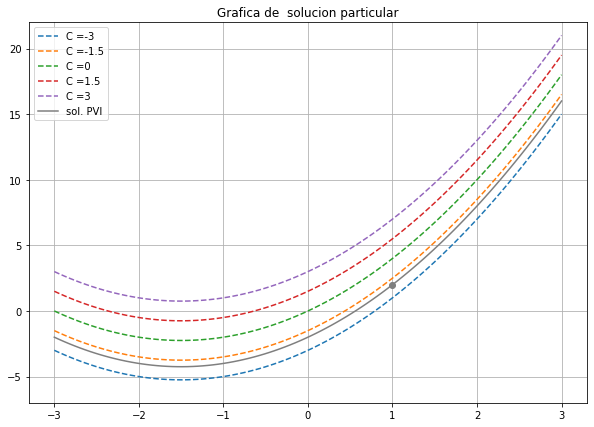

In [6]:
ysolgen = lambda x, C: x**2 + 3*x + C
ysolpvi = lambda x: ysolgen(x,-2)
fig, ax = plt.subplots(1,1, figsize = (10,7))
xplot = np.linspace(-3,3,100)
C = [-3, -1.5,0,1.5,3]
for i,Ci in enumerate(C):
    ax.plot(xplot, ysolgen(xplot,Ci),'--', label = "C ="+ str(Ci))
ax.plot(xplot, ysolpvi(xplot), 'C7',  label = "sol. PVI")
ax.plot(1,2, 'o', color='C7')
ax.legend()
ax.grid(True)
ax.set_ylim([-7,22])
ax.set_title('Grafica de  solucion particular')
plt.show()

### 1.3 Campo de Isoclinas y curvas solucion


In [7]:
# Funcion para graficar isoclinas
def isoclines(rng, function, num_points):
    arrowcolor = 'C7'
    l_rng = rng[1]-rng[0]
    #l_rng = min(rng[1]-rng[0], rng[3]-rng[2])
    a = sym.lambdify((x, y), function)  # function a is the differential#
    
    X, Y = np.meshgrid(np.linspace(rng[0], rng[1], num_points),
                       np.linspace(rng[2], rng[3], num_points))

    delta_x = np.ones_like(X)
    delta_y = a(X, Y)
    length = np.sqrt(delta_x**2 + delta_y**2)
    delta_x, delta_y = delta_x/length, delta_y/length
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    ax.set_title(r'Isoclinas')
    ax.set_xlabel(r'$\mathit{x}$')
    ax.set_ylabel(r'$\mathit{y}$')
    ax.grid()
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    #ax.set_aspect(1. / ax.get_data_ratio())
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.quiver(X, Y, delta_x, delta_y,
               pivot='mid',
               scale_units='xy', angles='xy', scale=16/l_rng, width=0.0025,color=arrowcolor, headwidth=1.5, headlength=2
               )
    #plt.show()
    return fig, ax

### Ejemplo:
Considere la ecuacion diferencial, para valores reales de $k$
$$\frac{dy}{dx} = k y $$
para $k=2,0.5,-1, 3$

(<Figure size 720x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Isoclinas'}, xlabel='$\\mathit{x}$', ylabel='$\\mathit{y}$'>)

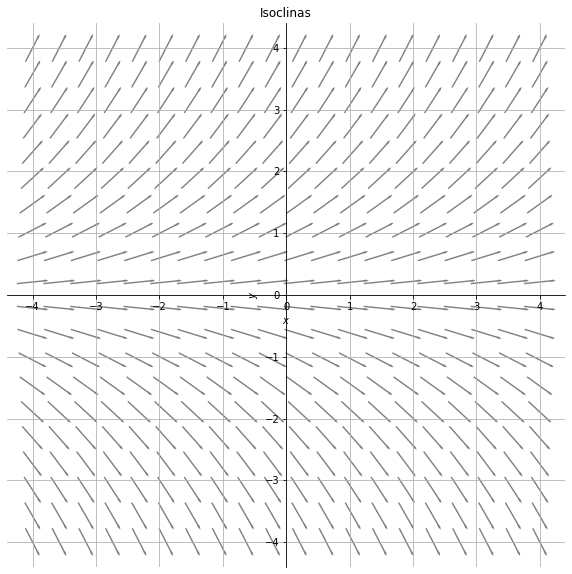

In [8]:
k = 0.5
fun = k * y
isoclines([-4,4,-4,4], fun, num_points=20)

### Ejemplo: 

Considere el problema de valor inicial
$$\frac{dy}{dx} = x- y,\quad  \mbox{con condicion inicial } y(-4) = 4$$

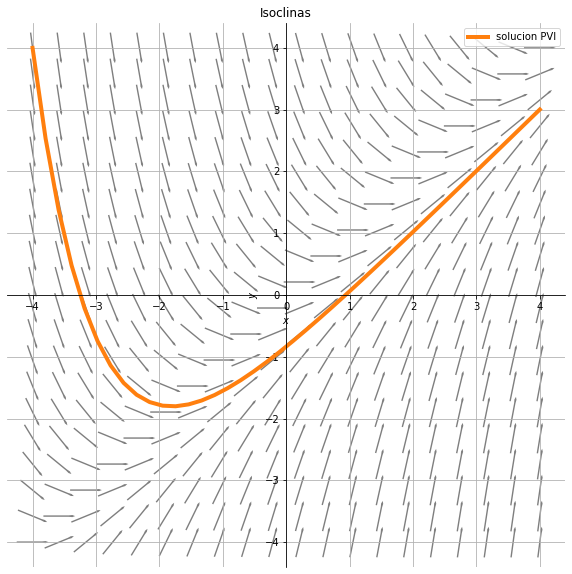

In [9]:
fun = x - y
fig, ax = isoclines([-4,4,-4,4], fun, num_points=20)

from scipy.integrate import odeint
xi = np.linspace(-4,4,40)
ysol = odeint(lambda y,x: x-y,4,xi)
ax.plot(xi, ysol, 'C1', linewidth=4, label='solucion PVI')
ax.legend()
plt.show()

### Ejemplo:

Considere la ecuacion logistica con $M=150$ y $k = 0.0004$.
$$
\frac{dP}{dt} = k P (M-P)
$$

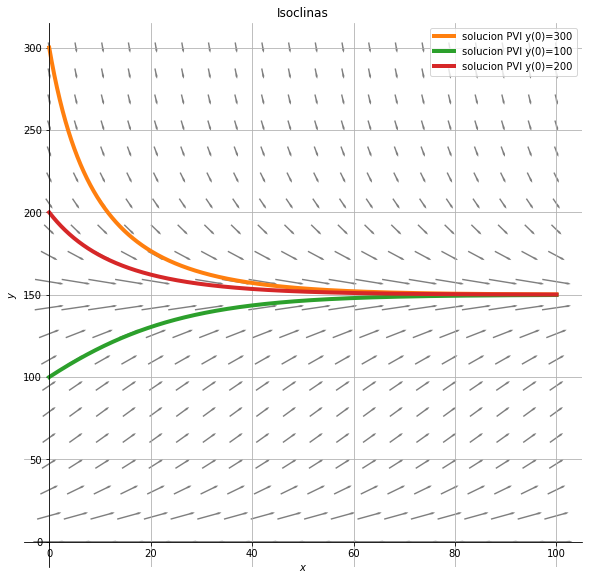

In [28]:
fun = 0.06*y-0.0004*y**2
fig, ax = isoclines([0,100,0,300], fun, num_points=20)

from scipy.integrate import odeint
xi = np.linspace(0,100,4000)
ysol = odeint(lambda p, t: 0.06*p-0.0004*p**2,300,xi)
ax.plot(xi, ysol, 'C1', linewidth=4, label='solucion PVI y(0)=300')
ysol = odeint(lambda p, t: 0.06*p-0.0004*p**2,100,xi)
ax.plot(xi, ysol, 'C2', linewidth=4, label='solucion PVI y(0)=100')
ysol = odeint(lambda p, t: 0.06*p-0.0004*p**2,200,xi)
ax.plot(xi, ysol, 'C3', linewidth=4, label='solucion PVI y(0)=200')
ax.legend()
plt.show()

### Existencia y Unicidad de soluciones: analisis de 3 casos:
\begin{equation}
1) \quad\frac{dy}{dx} = y^{2},\quad y(0)=1,
\end{equation}
\begin{equation}
2) \quad\frac{dy}{dx} = \frac{1}{x},\quad y(0)=0,
\end{equation}
\begin{equation}
3) \quad\frac{dy}{dx} = -2\sqrt{y},\quad y(0)=0.
\end{equation}


<lambdifygenerated-19>:2: RuntimeWarning: invalid value encountered in sqrt
  return -2*sqrt(y)


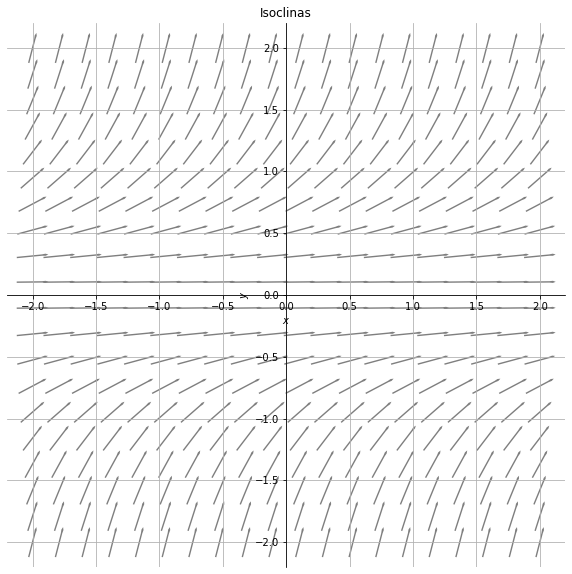

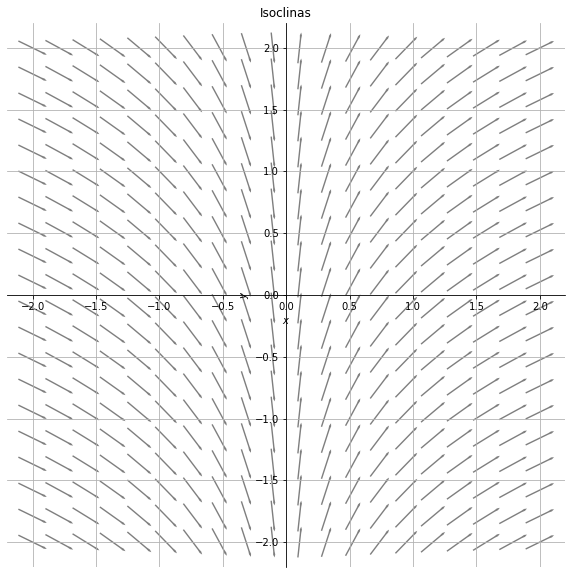

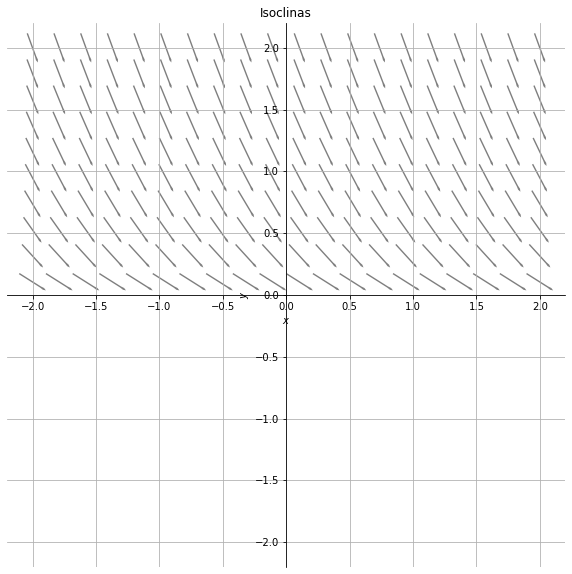

In [39]:
fun1 = y**2
fig1, ax1 = isoclines([-2,2,-2,2], fun1, num_points=20)
fun2 = 1/x
fig2, ax2 = isoclines([-2,2,-2,2], fun2, num_points=20)
fun3 = -2*sym.sqrt(y)
fig3, ax3 = isoclines([-2,2,-2,2], fun3, num_points=20)

## Clase 3:

### Seccion 1.4. Separacion de variables

### Ejemplo: Resuelva la ecuacion $$x \frac{dy}{dx} = 2y $$

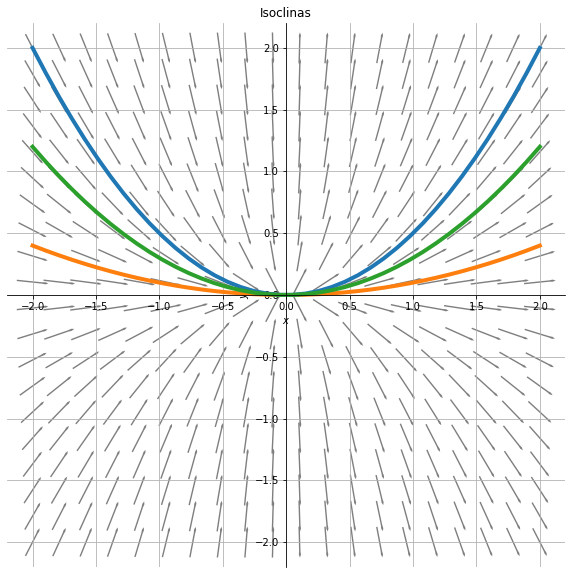

In [8]:
fun = 2*y/x
fig, ax = isoclines([-2,2,-2,2], fun, num_points=20)
from scipy.integrate import odeint
xi = np.linspace(-2,2,40)

ysol = lambda C, x: C * x**2
ax.plot(xi,ysol(0.1,xi), 'C1', linewidth=4)

ax.plot(xi, ysol(0.5,xi), 'C0', linewidth=4)
ax.plot(xi, ysol(0.3,xi), 'C2', linewidth=4)
plt.show()

### Ejemplo

Resuelva el PVI
$$
\frac{dy}{dx} = \frac{4-2x}{3y^2-5}, \quad y(1) = 3
$$

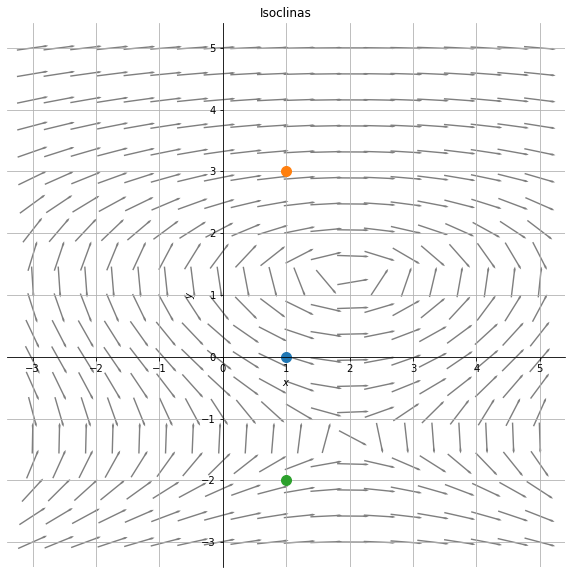

In [17]:
fun = (4-2*x)/(3*y**2-5)
fig, ax = isoclines([-3,5,-3,5], fun, num_points=20)
from scipy.integrate import odeint
xi = np.linspace(-2,2,40)
ax.plot(1,0, 'o', linewidth=4, markersize=10)
ax.plot(1,3, 'o', linewidth=4, markersize=10)
ax.plot(1,-2, 'o', linewidth=4, markersize=10)
plt.show()

# Ejemplo $ \frac{dy}{dx} = 2\sqrt{y}$

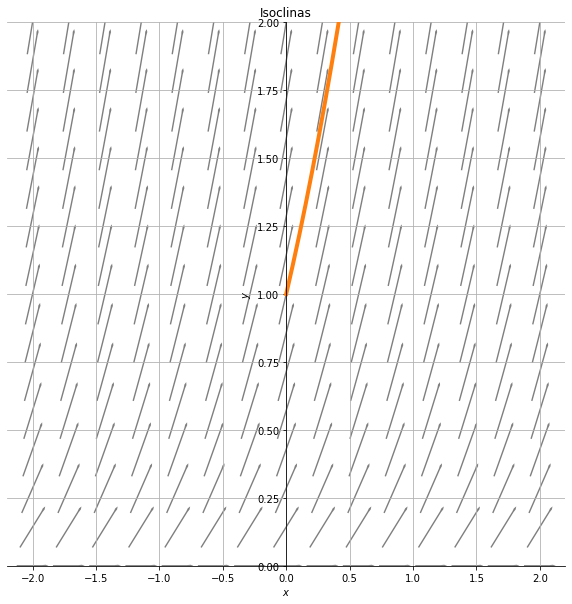

In [19]:
fun = 2*sym.sqrt(y)
fig, ax = isoclines([-2,2,0,2], fun, num_points=15)

from scipy.integrate import odeint
xi = np.linspace(0,2,40)

ysol = odeint(lambda y,x: 2*np.sqrt(y),1,xi)
ax.plot(xi,ysol, 'C1', linewidth=4)
ax.set_ylim([0,2])



plt.show()

# Ejemplo : $ \frac{dy}{dx} = 6 x (y-1)^{2/3}$ 

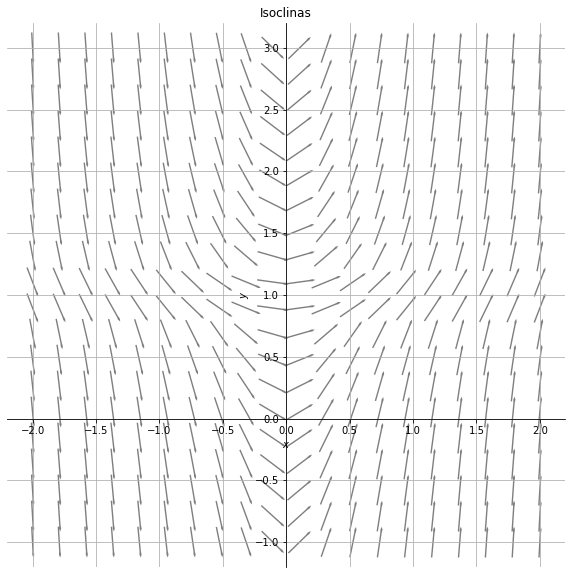

In [24]:
fun = 6*x*abs(y-1)**(2/3)
fig, ax = isoclines([-2,2,-1,3], fun, num_points=20)

from scipy.integrate import odeint
xi = np.linspace(-3,3,40)

ysol1 = lambda x: 1+ x**6
ysol2 = lambda x: 1 +0*x
#ax.plot(xi,ysol1(xi), 'C1', linewidth=4)
#ax.plot(xi,ysol2(xi), 'C0', linewidth=4)

#ax.set_ylim([0,3])



plt.show()

## Clase 4:

### Seccion 1.5 Ecuaciones lineales de primer order

### Ejemplo:  Resolver el problema de valor inicial

$$ \frac{dy}{dx} - y = \frac{11}{8} \exp(-x/3), \quad \mbox{con}\quad y(0) = -1$$

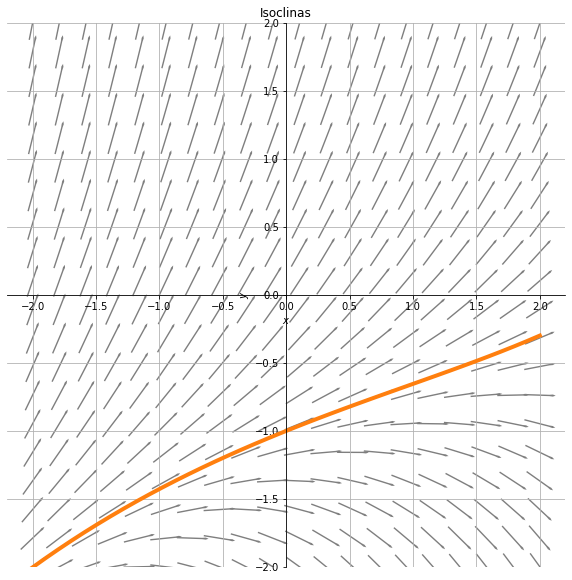

In [11]:
fun = y+11/8*sym.exp(-x/3)
fig, ax = isoclines([-2,2, -2,2], fun, num_points=20)

from scipy.integrate import odeint
xi = np.linspace(-2,2,40)

ysol = lambda x: np.exp(x)/32-33/32*np.exp(-x/3)
ax.plot(xi,ysol(xi), 'C1', linewidth=4)
ax.set_ylim([-2,2])
plt.show()

### Ejemplo: Resolver el problema de valor inicial 

$$(x^{2}+1)\frac{dy}{dx} + 3 x y = 6x, \quad\mbox{con}\quad y(0) = 3$$

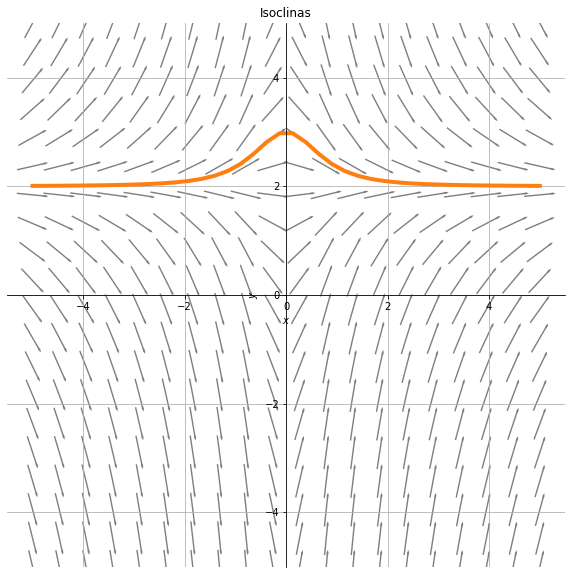

In [14]:
fun = -3*x*y/(x**2+1) + 6*x/(x**2+1)
fig, ax = isoclines([-5,5,-5,5], fun, num_points=20)

from scipy.integrate import odeint
xi = np.linspace(-5,5,40)

ysol = lambda x: 2+1/(x**2+1)**(3/2)
ax.plot(xi,ysol(xi), 'C1', linewidth=4)
ax.set_ylim([-5,5])
plt.show()

### Ejemplo: Resolver la siguiente ecuacion diferencial

$$\frac{dy}{dx} + \frac{1}{x} y = \frac{\sin(x)}{x^{2}}$$

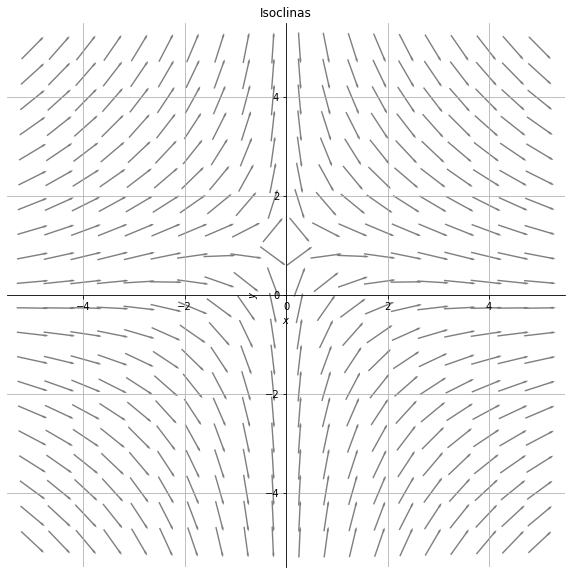

In [15]:
fun = -1/x*y + sym.sin(x)/x**2
fig, ax = isoclines([-5,5,-5,5], fun, num_points=20)

from scipy.integrate import odeint
xi = np.linspace(-5,5,40)

plt.show()

## Clase 5:


### Ejemplo: Resolver la ecuacion diferencial

$$ 2xy \frac{dy}{dx} = 4 x^{2} + 3 y^{2}$$

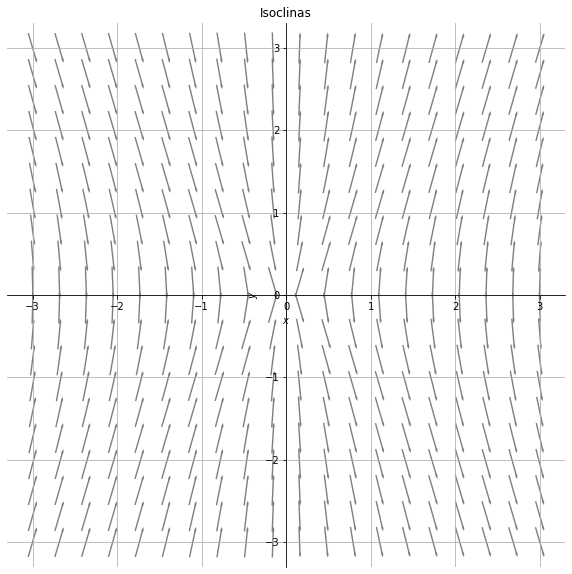

In [16]:
fun = (4*x**2+ 3*y**2)/(2*x*y)
fig, ax = isoclines([-3,3,-3,3], fun, num_points=20)

from scipy.integrate import odeint
xi = np.linspace(-3,3,40)

plt.show()

# Ejemplo $ x \frac{dy}{dx} + 6 y = 3 x y^{4/3}$



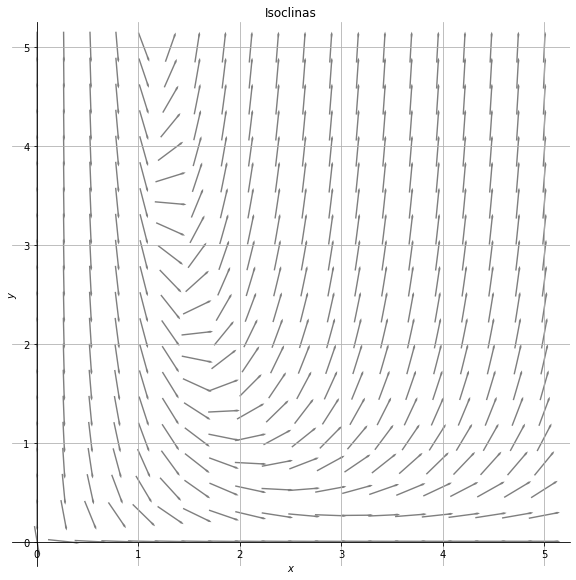

In [17]:
fun = 3*y**(4/3) - 6*y/x
fig, ax = isoclines([0.005,5,0.005,5], fun, num_points=20)

from scipy.integrate import odeint
xi = np.linspace(-5,5,40)

plt.show()

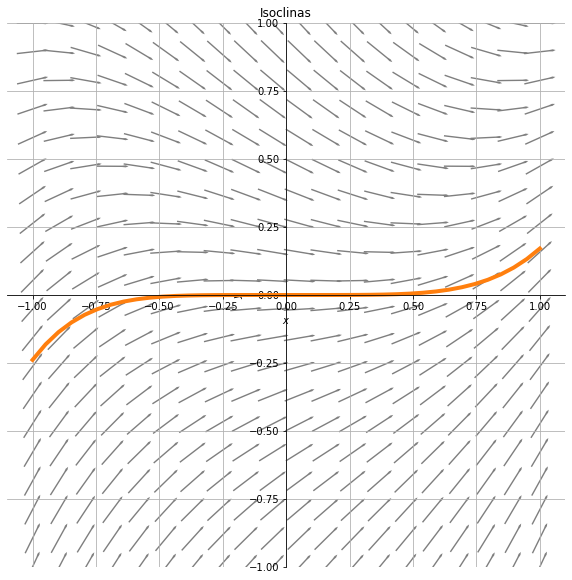

In [18]:
fun = x**2-y
fig, ax = isoclines([-1,1,-1,1], fun, num_points=20)

from scipy.integrate import odeint
xi = np.linspace(-1,1,40)
c_1 = -24
ysol = lambda t: c_1* np.exp(-t) + t**4 - 4* t**3 + 12* t**2 - 24* t + 24
ax.plot(xi,ysol(xi), 'C1', linewidth=4)
ax.set_ylim([-1,1])
plt.show()